In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

Sample code used: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#1.-Introduction-to-Decision-Tree-algorithm-

In [13]:
data_path = '/Users/andreslopez/Desktop/ECE3039/Project/survey _lung_cancer.csv'

df = pd.read_csv(data_path)

In [14]:
df.shape
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [15]:
xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')
xvar = df[['AGE']]
xvalue = pd.concat([df['GENDER'],xvalue], axis=1)
x_label = pd.concat([df['AGE'],xvalue], axis=1)
x_label = x_label.columns
xvalue = pd.get_dummies(xvalue)
X = pd.concat([xvar,xvalue], axis=1)
X = X.astype(int)
y = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)

print(X.columns)

Index(['AGE', 'GENDER_F', 'GENDER_M', 'SMOKING_NO', 'SMOKING_YES',
       'YELLOW_FINGERS_NO', 'YELLOW_FINGERS_YES', 'ANXIETY_NO', 'ANXIETY_YES',
       'PEER_PRESSURE_NO', 'PEER_PRESSURE_YES', 'CHRONIC DISEASE_NO',
       'CHRONIC DISEASE_YES', 'FATIGUE _NO', 'FATIGUE _YES', 'ALLERGY _NO',
       'ALLERGY _YES', 'WHEEZING_NO', 'WHEEZING_YES', 'ALCOHOL CONSUMING_NO',
       'ALCOHOL CONSUMING_YES', 'COUGHING_NO', 'COUGHING_YES',
       'SHORTNESS OF BREATH_NO', 'SHORTNESS OF BREATH_YES',
       'SWALLOWING DIFFICULTY_NO', 'SWALLOWING DIFFICULTY_YES',
       'CHEST PAIN_NO', 'CHEST PAIN_YES'],
      dtype='object')


/var/folders/wh/5rf3n2rs4875gpzdn9xgsbnw0000gn/T/ipykernel_30626/3888311157.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')


In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [18]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories='auto')

# Fit and transform on the training set
X_train= encoder.fit_transform(X_train)

# Transform the test set
X_test= encoder.transform(X_test)

In [19]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9355


In [21]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1])

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8826


In [23]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8826
Test set score: 0.9355


[Text(0.5416666666666666, 0.875, 'x[16] <= 0.5\ngini = 0.255\nsamples = 247\nvalue = [37, 210]'),
 Text(0.3333333333333333, 0.625, 'x[25] <= 0.5\ngini = 0.402\nsamples = 115\nvalue = [32, 83]'),
 Text(0.16666666666666666, 0.375, 'x[9] <= 0.5\ngini = 0.14\nsamples = 53\nvalue = [4, 49]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.25, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.5, 0.375, 'x[22] <= 0.5\ngini = 0.495\nsamples = 62\nvalue = [28, 34]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.4\nsamples = 29\nvalue = [8, 21]'),
 Text(0.75, 0.625, 'x[0] <= 0.5\ngini = 0.073\nsamples = 132\nvalue = [5, 127]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.375, 'x[6] <= 0.5\ngini = 0.059\nsamples = 131\nvalue = [4, 127]'),
 Text(0.75, 0.125, 'gini = 0.112\nsamples = 67\nvalue = [4, 63]'),


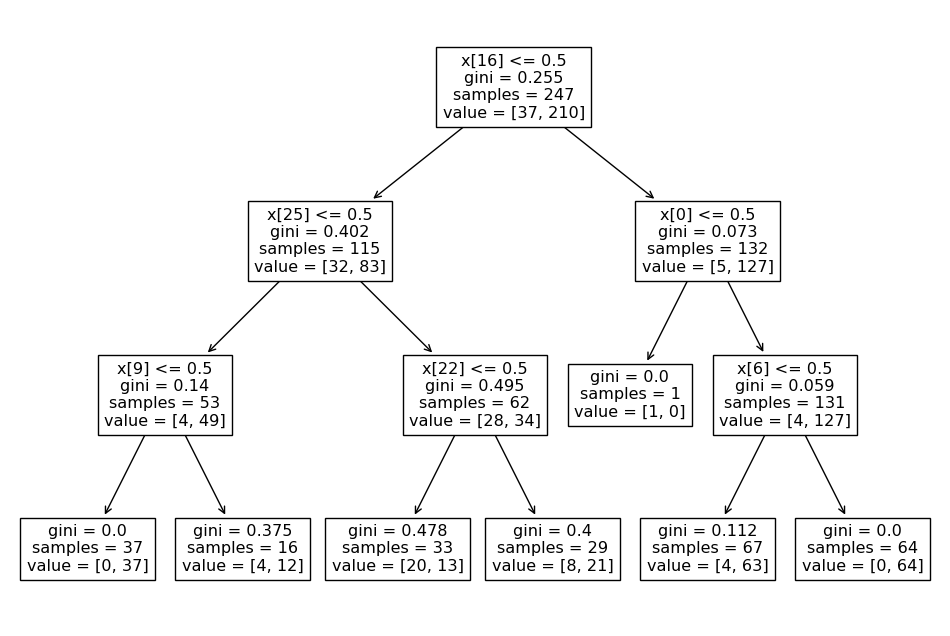

In [24]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

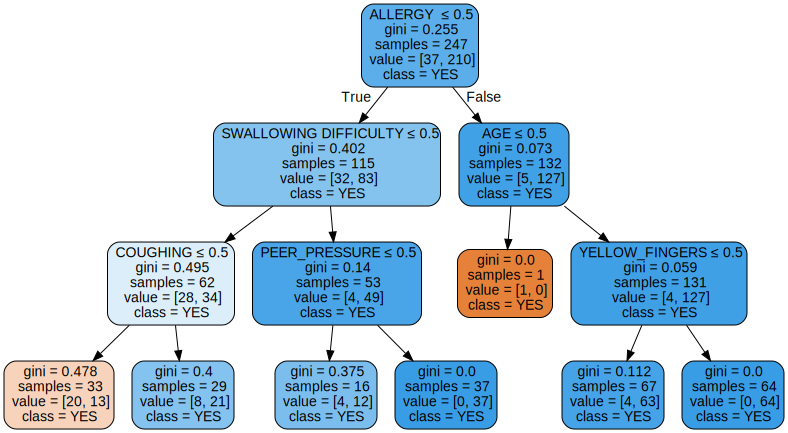

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 1  1]
 [ 3 57]]
